In [76]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn import svm

## ANN Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [77]:
# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [78]:
## load my dataset
df = pd.read_csv('fraud_dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [79]:
## understanding size of dataset
df.shape

(6362620, 11)

In [80]:
## checking for duplicates
df.duplicated().sum()

0

In [81]:
## getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [82]:
## checking for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [83]:
## aount variable value count
df['amount'].value_counts()


amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64

In [84]:
## dataset statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [85]:
## isfraud value count
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: ylabel='count'>

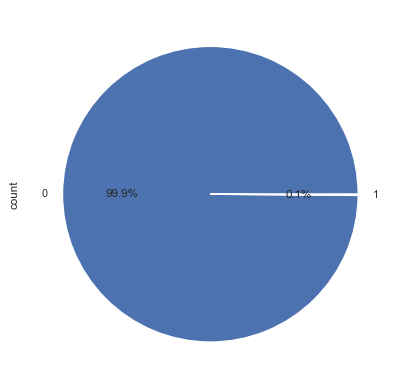

In [86]:
## isfraud piechart
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%')

In [87]:
## isFraud percentage
print("Not Fraud Percentage:",df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print("Fraud Percentage:",df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)

Not Fraud Percentage: 99.87091795518198
Fraud Percentage: 0.12908204481801522


In [88]:
## isFlaggedFraud value count
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

<Axes: ylabel='count'>

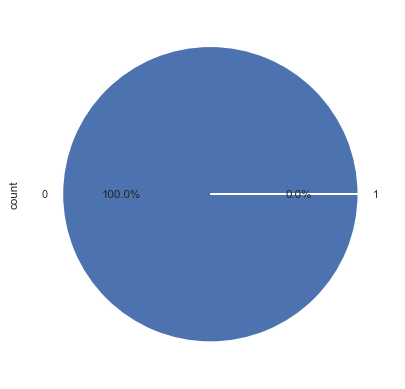

In [89]:
## isFlaggedfraud piechart
df['isFlaggedFraud'].value_counts().plot.pie(autopct='%1.1f%%')

In [90]:
## isFlaggedfraud piechart
print("Not Fraud Percentage:",df['isFlaggedFraud'].value_counts()[0]/len(df['isFlaggedFraud'])*100)
print("Fraud Percentage:",df['isFlaggedFraud'].value_counts()[1]/len(df['isFlaggedFraud'])*100)

Not Fraud Percentage: 99.99974853126542
Fraud Percentage: 0.000251468734577894


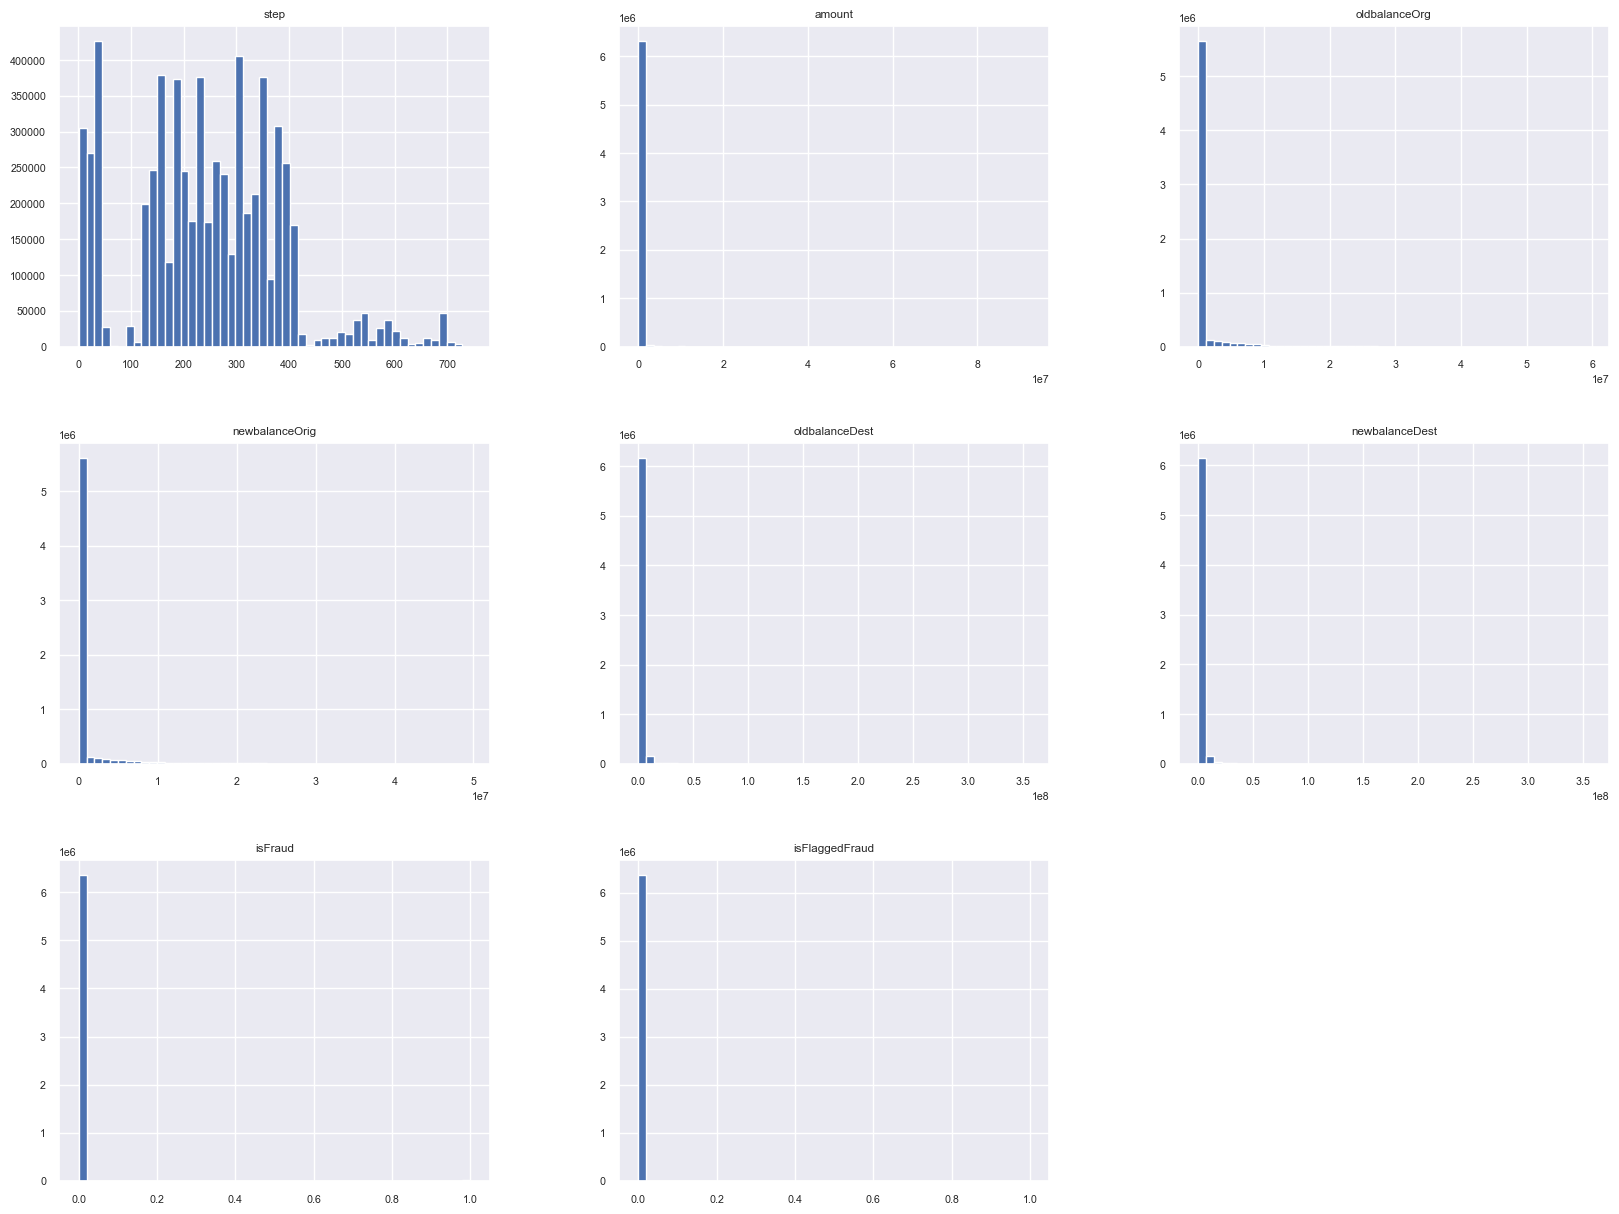

In [91]:
## calling the histogram method on the whole dataset
df.hist(bins=50, figsize=(20,15))
plt.show()

In [92]:
## type vale count
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='type'>

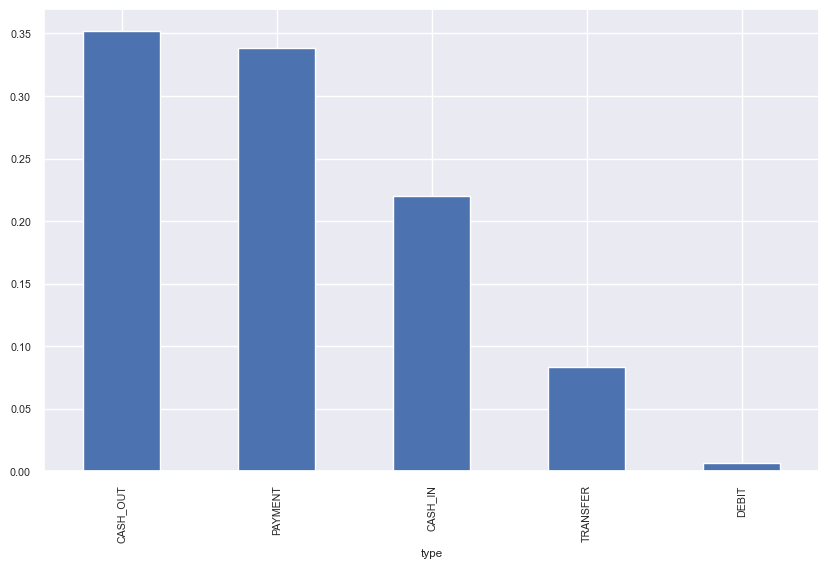

In [93]:
## type barchart
plt.figure(figsize =(10, 6))
pd.Series(df["type"]).value_counts(normalize=True).plot(kind="bar")

In [94]:
## exploratory data analysis
## correlation matrix

corrmat = df.corr(numeric_only=True)
corrmat

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

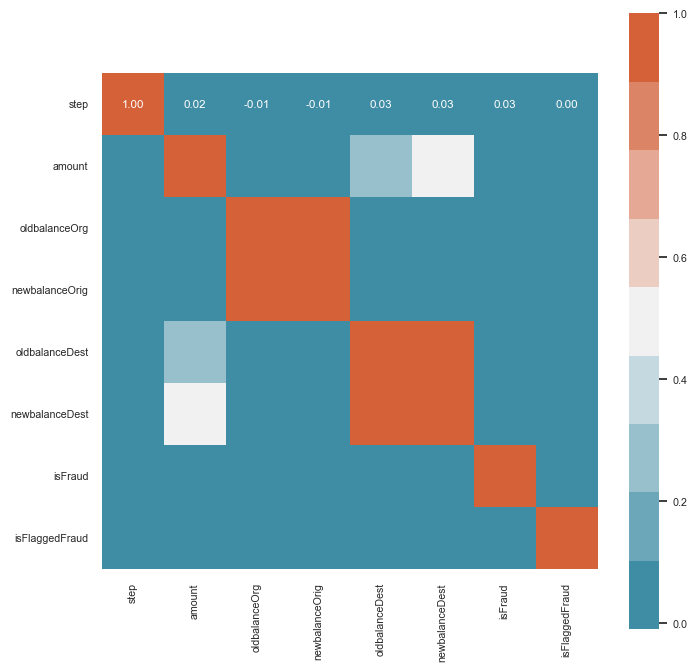

In [95]:
## Heatmap of corelation matrix
cmap = sns.diverging_palette(220, 22, s=80, l=55, n=9)
plt.subplots(figsize=(8,8))
sns. set(font_scale=0.7)
sns.heatmap(corrmat,cmap= cmap,annot=True, fmt='.2f', square=True)

<Axes: xlabel='newbalanceOrig', ylabel='oldbalanceOrg'>

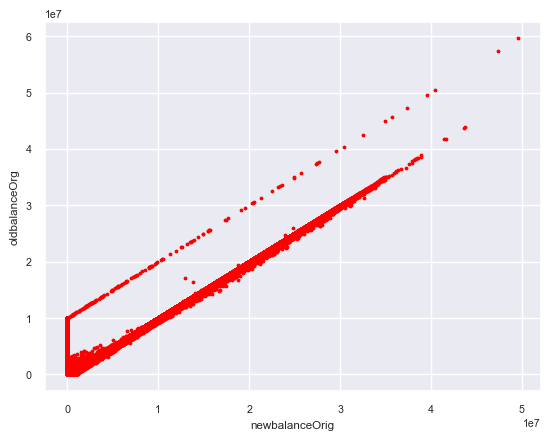

In [96]:
## visualising relationship of newbalanceOrig and oldbalanceOrg variables
df.plot(kind='scatter', x='newbalanceOrig', y='oldbalanceOrg', s=3, color='red')

<Axes: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

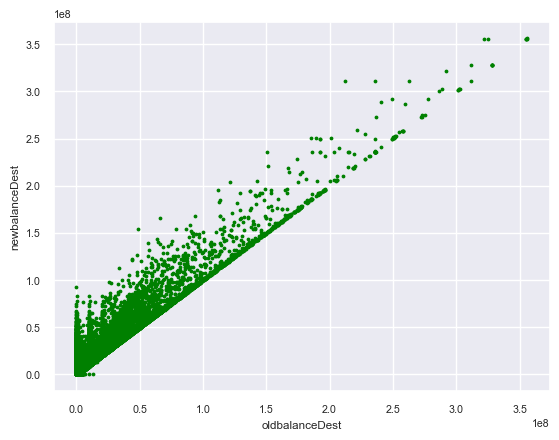

In [97]:
## visualising continuous variables of oldbalanceDest and newbalanceDest.
df.plot(kind='scatter', x='oldbalanceDest', y='newbalanceDest', s=3, color='green')

In [98]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [99]:
## dropping unnecessary columns for training
df.drop(['type', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
df=df.sample(500000)

In [100]:
df.value_counts().sum()

500000

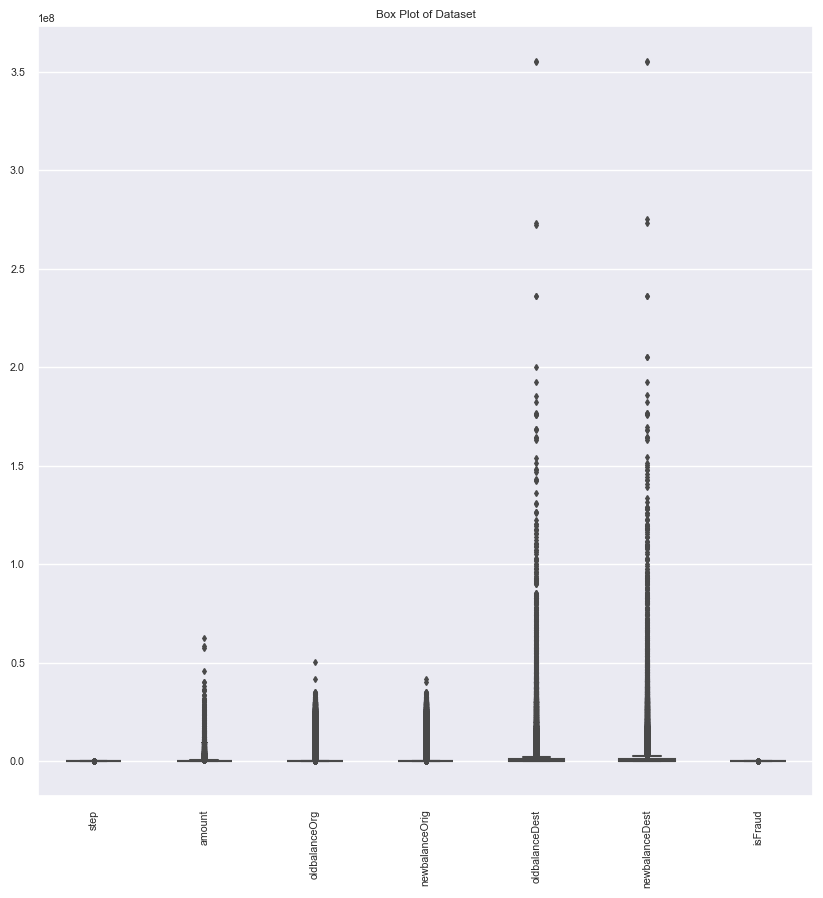

In [101]:
## calling Box plot for whole dataset
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
plt.title('Box Plot of Dataset', loc="center")
plt.xticks(rotation=90)
plt.show()

In [102]:

df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4425996,322,19682.66,26874.00,7191.34,0.00,0.00,0
6291556,664,543696.70,99422.00,0.00,0.00,543696.70,0
5209610,370,83173.99,1529907.79,1613081.78,9259897.75,9176723.76,0
5486518,380,137276.62,66.00,0.00,153914.36,291190.97,0
4918255,350,18394.42,0.00,0.00,0.00,0.00,0


In [103]:
df.value_counts().sum()

500000

In [104]:
## splitting the data into dependent and independent variable

x = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

In [105]:
## split the data into train test and split
## 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [106]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [107]:
## KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [108]:
y_pred_knn = knn_model.predict(x_test)

In [109]:
# create a dataframe for prediction

pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_knn})

,Actual,Predicted
5103125,0,0
4368324,0,0
4640315,0,0
2781027,0,0
4634162,0,0
...,...,...
1463558,0,0
1489936,0,0
1812472,0,0
902499,0,0


In [110]:
## classification report of KNN Model
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99863
           1       0.98      0.40      0.57       137

    accuracy                           1.00    100000
   macro avg       0.99      0.70      0.78    100000
weighted avg       1.00      1.00      1.00    100000



In [111]:
## confusion Matrix KNN

com_knn = confusion_matrix(y_test, y_pred_knn)

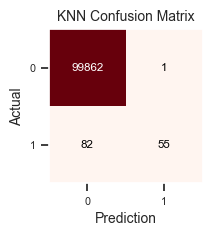

In [112]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(com_knn, figsize=(2,2), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('KNN Confusion Matrix', fontsize = 10)
plt.show()

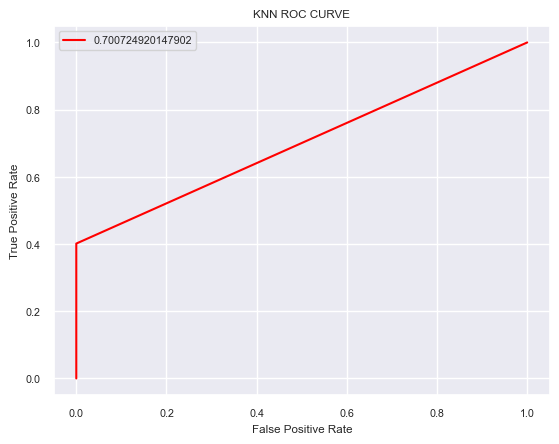

In [113]:
## ROC curve OF KNN MODEL
auc_knn = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, color = 'red', label = auc_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC CURVE')
plt.legend()
plt.show()

In [114]:
## Random Forest model

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [115]:
y_pred_rf = rf.predict(x_test)

In [116]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.99948


In [117]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

,Actual,Predicted
5103125,0,0
4368324,0,0
4640315,0,0
2781027,0,0
4634162,0,0
...,...,...
1463558,0,0
1489936,0,0
1812472,0,0
902499,0,0


In [118]:
## classification report of Random Forest Model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99863
           1       0.92      0.68      0.78       137

    accuracy                           1.00    100000
   macro avg       0.96      0.84      0.89    100000
weighted avg       1.00      1.00      1.00    100000



In [119]:
## confusion Matrix Random Forest

com_rf = confusion_matrix(y_test, y_pred_rf)

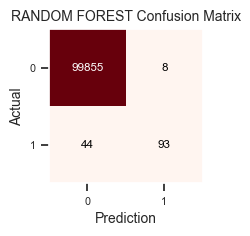

In [120]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(com_rf, figsize=(2,2), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('RANDOM FOREST Confusion Matrix', fontsize = 10)
plt.show()

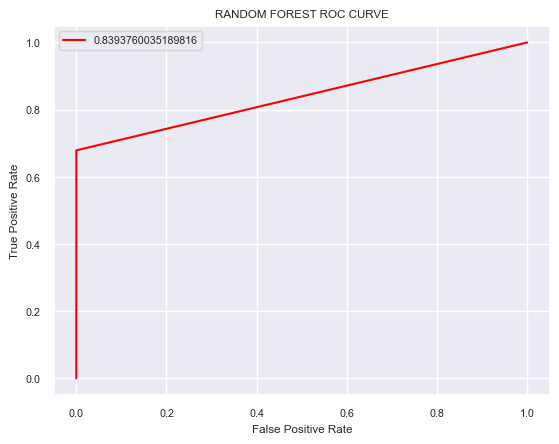

In [121]:
## ROC curve OF RANDOM FOREST MODEL
auc_rf = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, color = 'red', label = auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RANDOM FOREST ROC CURVE')
plt.legend()
plt.show()

In [122]:
## decision tree
## create a decision tree with criterion gini with no max depth
decision_gini = DecisionTreeClassifier()

## create a decision tree with entropy criterion with no max depth
decision_entropy = DecisionTreeClassifier(criterion= 'entropy')

## create a decision tree with max depth of 3
decision_depth = DecisionTreeClassifier(max_depth=3)

In [123]:
## fit thge model
decision_gini.fit(x_train, y_train)
decision_entropy.fit(x_train, y_train)
decision_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [124]:
## make prediction
y_pred_gini = decision_gini.predict(x_test)
y_pred_entropy = decision_entropy.predict(x_test)
y_pred_max = decision_depth.predict(x_test)

In [125]:
## model evaluation
print('Accuracy(gini):', metrics.accuracy_score(y_test, y_pred_gini))
print('Accuracy(entropy):', metrics.accuracy_score(y_test, y_pred_entropy))
print('Accuracy(max):', metrics.accuracy_score(y_test, y_pred_max))

Accuracy(gini): 0.99943
Accuracy(entropy): 0.99933
Accuracy(max): 0.99889


In [126]:
## classification report of Decision Tree Model Entropy
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99863
           1       0.76      0.75      0.75       137

    accuracy                           1.00    100000
   macro avg       0.88      0.88      0.88    100000
weighted avg       1.00      1.00      1.00    100000



In [127]:
## confusion Matrix Decision Tree Model Entropy

com_dt = confusion_matrix(y_test, y_pred_entropy)

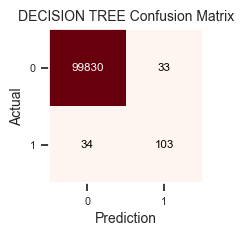

In [128]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(com_dt, figsize=(2,2), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('DECISION TREE Confusion Matrix', fontsize = 10)
plt.show()

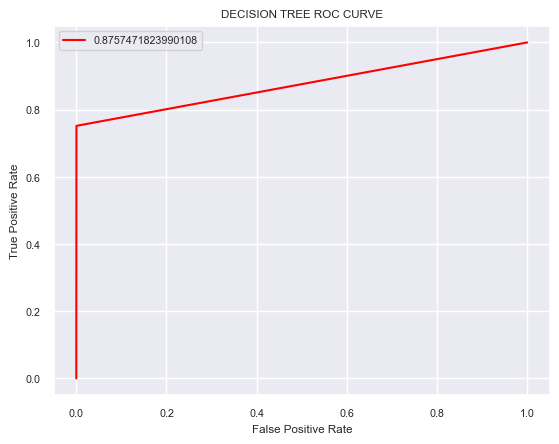

In [129]:
## ROC curve OF Decision Tree Entropy
auc_entropy = roc_auc_score(y_test, y_pred_entropy)
fpr, tpr, _ = roc_curve(y_test, y_pred_entropy)
plt.plot(fpr, tpr, color = 'red', label = auc_entropy)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DECISION TREE ROC CURVE')
plt.legend()
plt.show()

In [130]:
## initialize the neural network
model = Sequential()

## input layers
model.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu', input_dim = 6))

## hidden layer 1
model.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu'))

## regularization
model.add(Dropout(0.25))

## hidden layer 2
model.add(Dense(units=4, kernel_initializer='uniform', activation = 'relu'))

## regularization
model.add(Dropout(0.10))

## regularization
model.add(Dropout(0.10))

## output layer
model.add(Dense(units= 1, kernel_initializer='uniform', activation = 'sigmoid'))

In [131]:
## compile the network
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics =['accuracy'] )

In [132]:
## train the network ARTIFICIAL NEURAL NETWORK

history = model.fit(x_train, y_train, batch_size= 20, epochs= 35, validation_split= 0.15)

Epoch 1/35
17000/17000 [==============================] - 8s 476us/step - loss: 0.0161 - accuracy: 0.9987 - val_loss: 0.0070 - val_accuracy: 0.9987
Epoch 2/35
17000/17000 [==============================] - 8s 452us/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0061 - val_accuracy: 0.9987
Epoch 3/35
17000/17000 [==============================] - 8s 454us/step - loss: 0.0078 - accuracy: 0.9987 - val_loss: 0.0060 - val_accuracy: 0.9987
Epoch 4/35
17000/17000 [==============================] - 8s 478us/step - loss: 0.0075 - accuracy: 0.9987 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 5/35
17000/17000 [==============================] - 8s 464us/step - loss: 0.0075 - accuracy: 0.9987 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 6/35
17000/17000 [==============================] - 8s 453us/step - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.0056 - val_accuracy: 0.9987
Epoch 7/35
17000/17000 [==============================] - 8s 452us/step - loss: 0.0072 - accuracy: 0.9987 - val_

In [133]:
## save my model
model.save('fraud_model')

INFO:tensorflow:Assets written to: fraud_model/assets


INFO:tensorflow:Assets written to: fraud_model/assets


In [134]:
## load saved ANN model
fraud_model = tf.keras.models.load_model('fraud_model')

In [135]:
## make predictions on test data
y_pred_ann = fraud_model.predict(x_test)
y_pred_ann

3125/3125 [==============================] - 1s 286us/step


array([[0.0000000e+00],
       [3.1737200e-05],
       [4.3300306e-06],
       ...,
       [6.3670920e-15],
       [3.0904246e-09],
       [1.1729793e-05]], dtype=float32)

In [136]:
## set a threshold
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

In [137]:
y_pred_ann.shape

(100000, 1)

In [138]:
y_test.shape

(100000,)

In [139]:
## flatten
y_pred_ann = y_pred_ann.flatten()
y_pred_ann.shape

(100000,)

In [140]:
## put in Dataframe
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
5103125,0,0
4368324,0,0
4640315,0,0
2781027,0,0
4634162,0,0
...,...,...
1463558,0,0
1489936,0,0
1812472,0,0
902499,0,0


In [141]:
## classification report ANN
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99863
           1       0.00      0.00      0.00       137

    accuracy                           1.00    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       1.00      1.00      1.00    100000



In [142]:
## confusion Matrix ANN

conf_mat_ann = confusion_matrix(y_test, y_pred_ann)

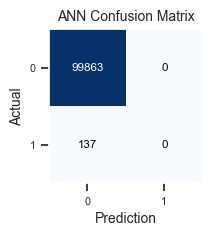

In [143]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_ann, figsize=(2,2), cmap=plt.cm.Blues)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('ANN Confusion Matrix', fontsize = 10)
plt.show()

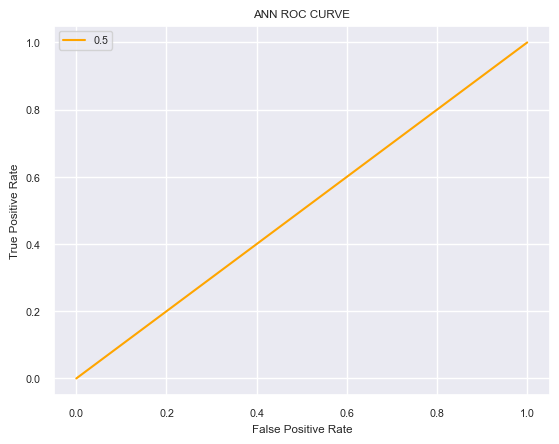

In [144]:
## ROC curve OF ANN
auc_ann = roc_auc_score(y_test, y_pred_ann)
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color = 'orange', label = auc_ann)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC CURVE')
plt.legend()
plt.show()

In [145]:
## train the model LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

LogisticRegression()

In [146]:
## make prediction
LR_pred = model_LR.predict(x_test)

In [147]:
## PUTTING THE ACTUAL AND PREDICTED IN A DATAFRAME
pd.DataFrame({'Actual': y_test, 'Predicted': LR_pred})

,Actual,Predicted
5103125,0,0
4368324,0,0
4640315,0,0
2781027,0,0
4634162,0,0
...,...,...
1463558,0,0
1489936,0,0
1812472,0,0
902499,0,0


In [148]:
## model evaluation
accuracy_LR = accuracy_score(y_test, LR_pred )

## confusion matrix
conf_mat_LR = confusion_matrix(y_test, LR_pred)


print(accuracy_LR)
print(conf_mat_LR)

0.99911
[[99862     1]
 [   88    49]]


In [149]:
## classification report for LOGISTIC REGRESSION MODEL
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99863
           1       0.98      0.36      0.52       137

    accuracy                           1.00    100000
   macro avg       0.99      0.68      0.76    100000
weighted avg       1.00      1.00      1.00    100000



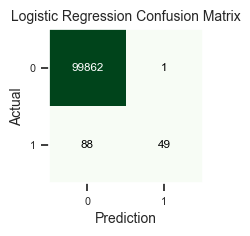

In [150]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_LR, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

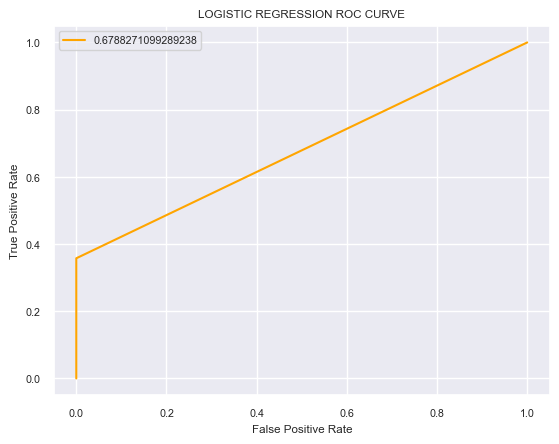

In [151]:
## ROC curve of LOGISTIC REGRESSION MODEL
auc_LR = roc_auc_score(y_test, LR_pred)
fpr, tpr, _ = roc_curve(y_test, LR_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOGISTIC REGRESSION ROC CURVE')
plt.legend()
plt.show()